In [1]:
# Fix the random seed.
import random
import numpy as np
import torch


def seed_everything(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True


In [2]:
seed_everything()

In [4]:
import pandas as pd

df = pd.read_csv('../meta/train.csv')

In [2]:
import os
import sys


project_path = os.environ.get('PROJECT_PATH', '../')

sys.path.append(os.path.join(project_path, 'src'))

In [9]:
from torchvision import models

vgg16_model = models.vgg16(weights="IMAGENET1K_V1")

In [10]:
vgg16_model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [16]:
import torch
import torch.nn as nn

m = nn.AdaptiveAvgPool2d((1, 1))
input = torch.randn(1, 3, 2, 2)
output = m(input)

In [18]:
output.shape

torch.Size([1, 3, 1, 1])

In [17]:
input, output

(tensor([[[[ 1.0684, -0.4799],
           [ 0.0607,  0.3157]],
 
          [[ 1.1481, -0.0322],
           [-0.2426, -0.3627]],
 
          [[ 1.9555,  0.3352],
           [-0.7410, -2.2745]]]]),
 tensor([[[[ 0.2412]],
 
          [[ 0.1277]],
 
          [[-0.1812]]]]))

In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
import matplotlib.pyplot as plt

def scale_to_01(tensor):
    """
    Function to scale score a tesnor of batch size x dim
    """
    scaled_tensor = (tensor - tensor.min().item()) / (tensor.max().item() - tensor.min().item())
    return scaled_tensor

def show_image(image, name_img: str):
    """
    Instance method that would plot an
    image to see if the dataset is properly set.
    """
    f, ax1 = plt.subplots(1, 1)
    image = (image - image.min()) / (image.max() - image.min()) 
    ax1.set_title('Desired image ' + name_img)
    ax1.imshow(image.permute(1,2,0).squeeze(),cmap = 'gray')
    plt.show()

In [6]:
# load model from checkpoint using torch
import torch
from train.vae import VAE

vae = VAE()
vae.load_from_checkpoint('../models/vae/2024-05-29_14-10-15-toy-vae-50-epochs')

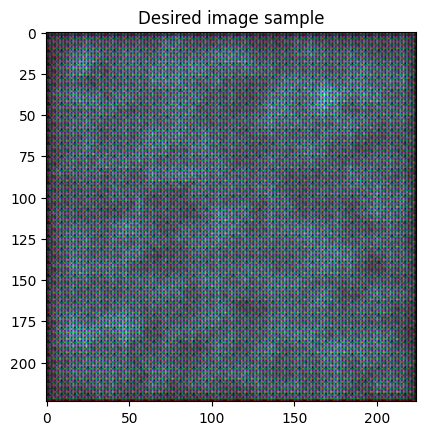

In [7]:
sample = vae.sample()
show_image(sample[0], 'sample')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


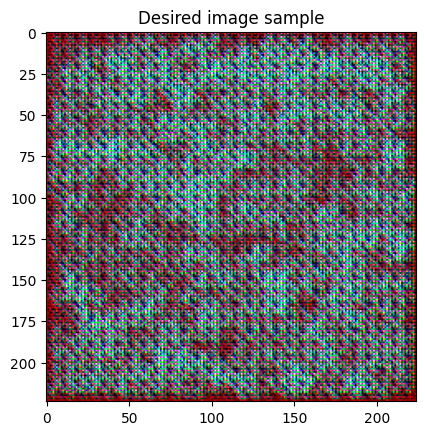

In [6]:
sample = vae.sample()
show_image(sample[0], 'sample')

In [9]:
torch.min(sample)

tensor(0.)

In [39]:
# load model from checkpoint using torch
import torch
from train.vae import VAE

vae = VAE()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


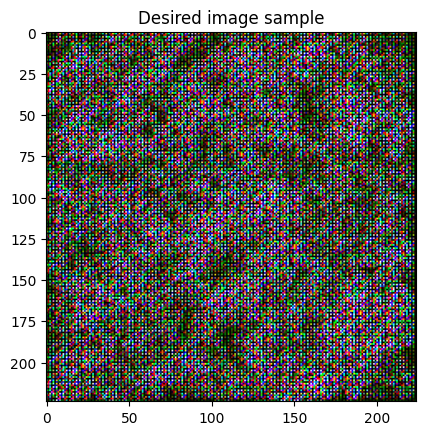

In [40]:
sample = vae.sample()
show_image(sample[0], 'sample')

In [41]:
total_params = sum(p.numel() for p in vae.parameters())
trainable_params = sum(p.numel() for p in vae.parameters() if p.requires_grad)
total_params, trainable_params

(152405085, 137690397)